We import torchvision in order to load the dataset.

In [15]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

Device configuration

In [16]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Hyperparameters<br>
input size is 28x28

In [17]:
input_size = 784
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

MNIST dataset

In [18]:
train_dataset = torchvision.datasets.MNIST(root='./datasetMNIST', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./datasetMNIST', train=False, transform=transforms.ToTensor())

Loading the dataset<br>
Note: We dont shuffle the test set because it doesn't matter for evaluation.

In [19]:
train_dataset_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_dataset_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

Lets explore the dataset<br>
torch.Size([100, 1, 28, 28]) - means 100 images of 1 channel and 28x28 pixels<br>
torch.Size([100]) - means 100 labels

In [20]:
data = iter(train_dataset_loader)
images, labels = data.next()
print(images.shape)
print(labels.shape)

torch.Size([100, 1, 28, 28])
torch.Size([100])


Plot some of the images in the dataset<br>
images[i][0] - image I and channel 0<br>
subplot(x, y, index) - x and y are the number of rows and columns in the plot

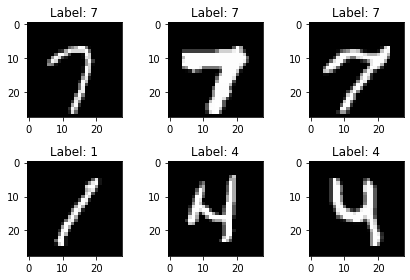

In [21]:
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.tight_layout()
    plt.imshow(images[i][0], cmap='gray')
    plt.title("Label: {}".format(labels[i]))

Creating our Neural Network<br>
We have to implement class that derives from torch.nn.Module<br>
Note: we don't apply softmax to the output of the last layer because we will use cross-entropy loss.

In [22]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

Model, Loss and Optimizer

In [23]:
model = NeuralNet(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

Training the Model

In [24]:
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_dataset_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad() # clear gradients for this training step
        loss.backward() # backpropagation, compute gradients
        optimizer.step() # update step and updates some parameters, apply gradients

        if (i+1) % 100 == 0:
            print("Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}"
                  .format(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.item()))

Epoch [1/2], Step [100/600], Loss: 0.4684
Epoch [1/2], Step [200/600], Loss: 0.3777
Epoch [1/2], Step [300/600], Loss: 0.2526
Epoch [1/2], Step [400/600], Loss: 0.2885
Epoch [1/2], Step [500/600], Loss: 0.2670
Epoch [1/2], Step [600/600], Loss: 0.1992
Epoch [2/2], Step [100/600], Loss: 0.1796
Epoch [2/2], Step [200/600], Loss: 0.1244
Epoch [2/2], Step [300/600], Loss: 0.1773
Epoch [2/2], Step [400/600], Loss: 0.3942
Epoch [2/2], Step [500/600], Loss: 0.1566
Epoch [2/2], Step [600/600], Loss: 0.1060


Testing the Model

In [25]:
num_correct = 0
num_samples = 0
with torch.no_grad():
    for images, labels in test_dataset_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)

        # values, indices
        _, predicted = torch.max(outputs, 1)
        
        num_correct += (predicted == labels).sum().item()
        num_samples += labels.shape[0]
    
    acc = 100.0 * num_correct / num_samples
    print("Accuracy of the network on the 10000 test images: {} %".format(acc))


Accuracy of the network on the 10000 test images: 95.36 %
